# **Project Name**    - Algerian Fire Forecaster

##### **Project Type**    - Machine Learning
##### **Contribution**    - Individual
##### **Team Member 1**   - Ankith Rathor

# **GitHub Link**

https://github.com/AnkithRathor/Algerian-Fire-Forecaster

# **Introduction**


* Welcome to the 'Algerian Fire Forecaster,' a cutting-edge project leveraging Machine Learning and Python to predict wildfire risks in Algeria.
* This project analyzes key factors like Temperature, Relative Humidity, Wind speed, Rain level,Fine Fuel Moisture Code, Duff Moisture Code, Drought Code, Initial Spread Index, Buildup Index and predicts Fire Weather Index.
* By fusing meteorological data with machine learning, this project aims to provide timely insights for effective firefighting and emergency response, offering a proactive approach to wildfire management in Algeria.

# **Objective**

The objective of this project is to utilize Python and machine learning techniques for predicting the Fire Weather Index (FWI) in different locations across Algeria.

# **Data Collection**

The data for this project was collected from Kaggle, a popular platform for data science competitions and datasets.

* Check out the dataset [here](https://github.com/Bharathkumar-Tamilarasu/Algerian-Fire-Forecaster/blob/main/data/raw_data/Algerian_forest_fires_dataset_UPDATE.csv)

# **About the Dataset**

### Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012. The dataset includes 11 attribues and 1 output attribue (class) The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

### Attribute Information:


* Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
* Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
* RH : Relative Humidity in %: 21 to 90
* Ws :Wind speed in km/h: 6 to 29
* Rain: total day in mm: 0 to 16.8 FWI Components
* Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
* Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
* Drought Code (DC) index from the FWI system: 7 to 220.4
* Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
* Buildup Index (BUI) index from the FWI system: 1.1 to 68
* Fire Weather Index (FWI) Index: 0 to 31.1
* Classes: two classes, namely Fire and not Fire

# **Libraries Used**

Employed the following libraries for comprehensive data analysis:

* **Pandas** for versatile data manipulation.
* **NumPy** for efficient numerical operations.
* Leveraged **Scikit-Learn** for machine learning tasks and predictive modeling.
* Utilized **Matplotlib.Pyplot** and **Seaborn** for creating insightful visualizations.
* Integrated **Regex** for advanced text pattern matching.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score

# **Project Work Flow**

## 1. **Data Exploration**

Dive into an in-depth exploration of the dataset to gain insights into its structure, features, and distributions.

### Dataset Loading

In [2]:
import pandas as pd

try:
    from google.colab import drive
    IN_COLAB = True  # Flag to indicate we are in Google Colab
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    drive.mount('/content/drive')
    csv_file = r'F:\Ankith\Project\Python Projects\fire prediction\Data\Algerian_forest_fires_dataset_UPDATE.csv'  # Original path
else:
    # If not in Colab, specify the local file path
    csv_file = r'F:\Ankith\Project\Python Projects\fire prediction\Data\Algerian_forest_fires_dataset_UPDATE.csv'

df1 = pd.read_csv(csv_file, header=1)

print(df1.head())

  day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire     


In [3]:
# Loading Dataset
df1 = pd.read_csv(r'F:\Ankith\Project\Python Projects\fire prediction\Data\Algerian_forest_fires_dataset_UPDATE.csv',header=1)

### Dataset First View

In [4]:
# Dataset First Look
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df1.shape

(246, 14)

Obeservation: Dataset has 246 rows and 14 columns.

### Dataset Insights

In [6]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
print(df1[df1.duplicated() == True].shape)

(0, 14)


Obeservation: Dataset doesnt contain any duplicate rows

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df1.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

Observation: We found missing values on all columns except 'Day' column


### Attributes Overview

In [9]:
# Dataset Columns
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [10]:
# Dataset Describe
df1.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


## **2. Data Wrangling**

Perform data cleaning, handle missing values, and transform the data into a suitable format for analysis.

In [11]:
df2 = df1.copy()

In [12]:
# Data Set information before wrangling
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### i) Dropping Unnecessary Rows

In [13]:
# Identified Unnecessary Rows (i.e 122& 123)

df2.loc[120:130,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
129,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire


In [14]:
# Dropping those rows

df2.drop([122,123],axis=0,inplace=True)
df2.reset_index(drop=True,inplace=True)

### ii) Dropping NA Rows

In [15]:
# Checking if any rows have a null value

df2[df2.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [16]:
# Dropping the rows containing null values

df2.dropna(inplace=True)
df2.reset_index(drop=True,inplace=True)

### iii) Handling Columns

In [17]:
df3 = df2.copy()

In [18]:
# Removing the extra spaces in column names

df3.columns = df3.columns.str.strip()
df3.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [19]:
# Adding a Region column

# Label 0 for Bejaia Region
# Label 1 for Sidi-Bel Abbes Region

df3.loc[:121,'Region']=0
df3.loc[122:,'Region']=1

The dataset is converted into two sets based on Region. Added a new column 'Region'

0 : "Bejaia Region" - From 0th - 121st Index

1 : "Sidi-Bel Abbes Region" - From 122nd - 243rd Index



In [20]:
# Changing Data Types of the columns

columns_tobechanged_int = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws','Region']
df3[columns_tobechanged_int]=df3[columns_tobechanged_int].astype(int)

columns_tobechanged_float = [col for col in df3.columns if (df3[col].dtype==object) and col!='Classes']
df3[columns_tobechanged_float]=df3[columns_tobechanged_float].astype(float)

In [21]:
# Removing additional spaces of the categorical values of 'Classes' column

df3['Classes']=df3['Classes'].str.strip()

In [22]:
# Data Set information after wrangling

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [23]:
df3.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [24]:
# Saving the cleaned Data Set

df3.to_csv(r'F:\Ankith\Project\Python Projects\fire prediction\Data\Algerian_forest_fires_dataset_cleaned.csv',index=False)

## **3. Exploratory Data Analysis**

Conduct EDA to uncover patterns, trends, and relationships within the data using visualizations and statistical analyses.

In [25]:
df4 = df3.copy()

In [26]:
# Dropping columns which we will not use

df4.drop(['day','month','year'],axis=1,inplace=True)
df4.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [27]:
# Encoding of the categories in Classes column
# 0 for Not Fire
# 1 for Fire

df4['Classes']=np.where(df4['Classes'].str.contains('not fire'),0,1)

In [28]:
df4.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


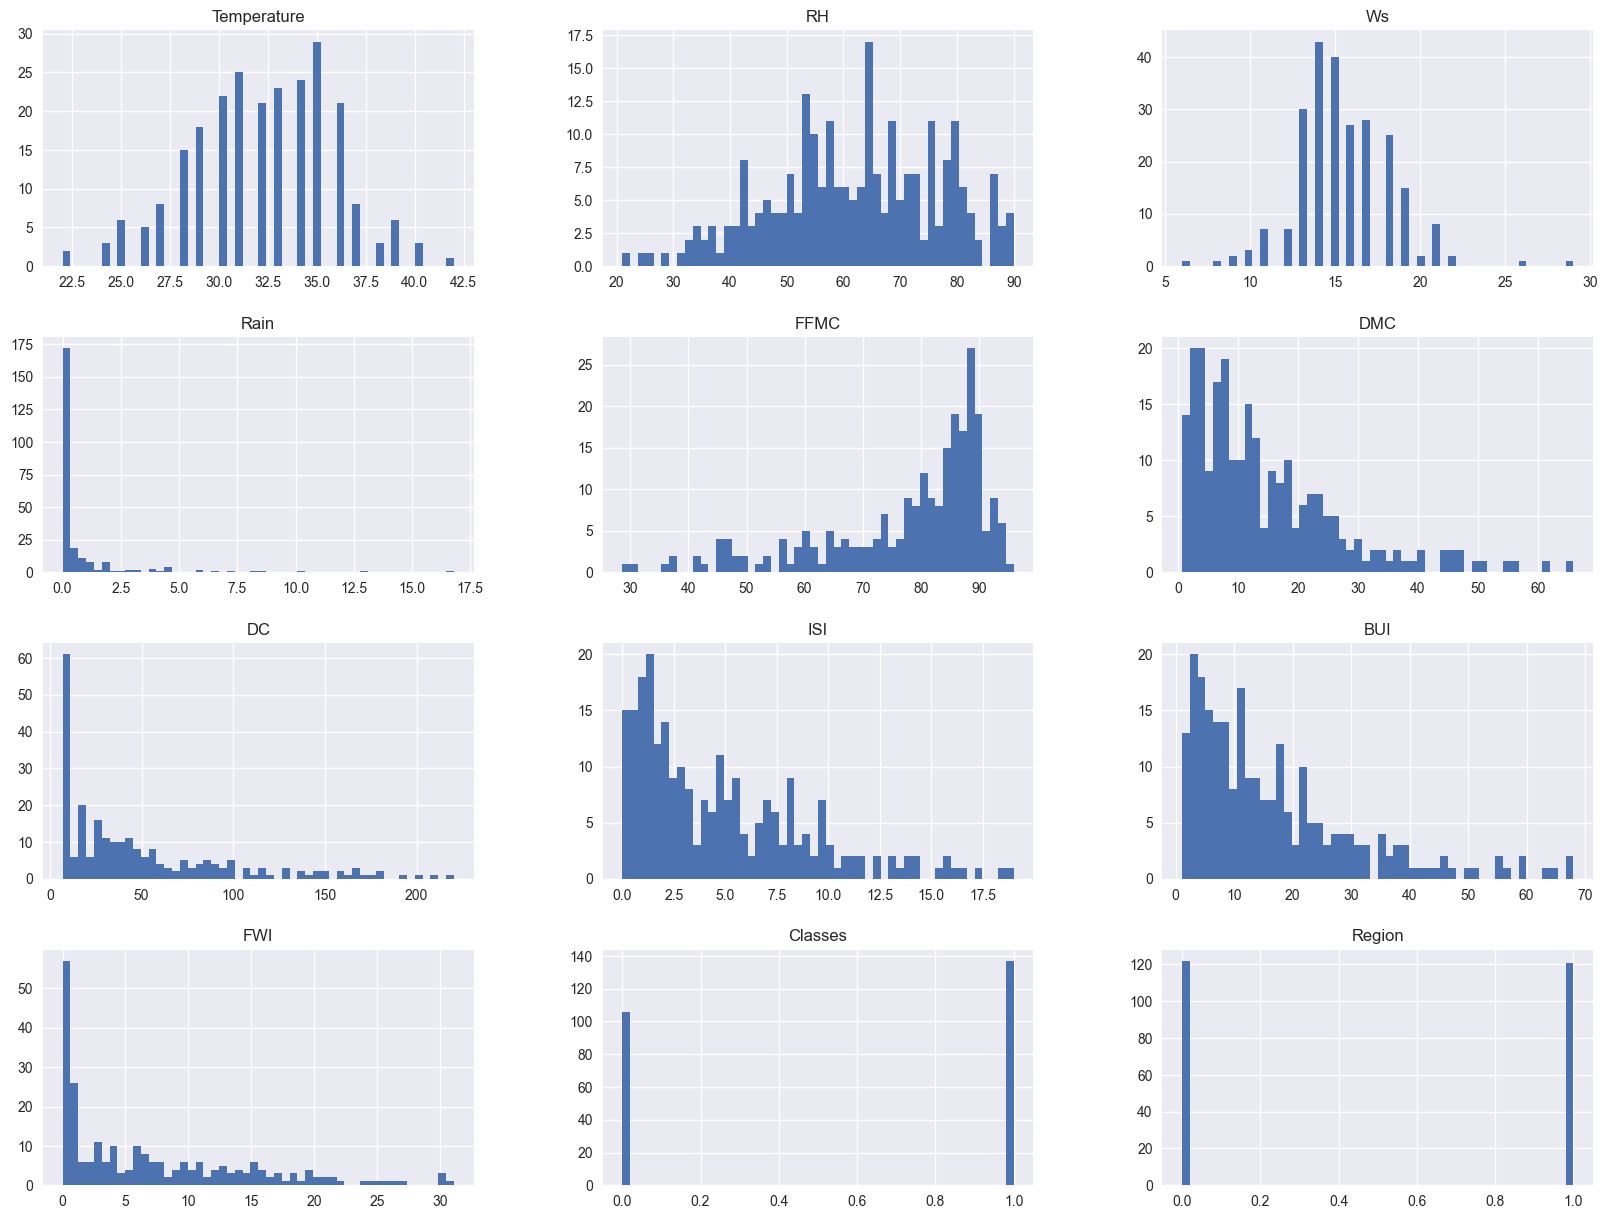

In [34]:
# Plotting desnity plot for all features

plt.style.use('seaborn-v0_8')  # Or seaborn-v0_8-<style> for a specific seaborn style
df4.hist(bins=50,figsize=(20,15))
plt.show()

In [31]:
# Creating a Pie Chart

values = np.array(df4['Classes'].value_counts(normalize=True)*100)
pielabels = ['Fire','Not Fire']
piecolors = ['#F84F31','#23C552']

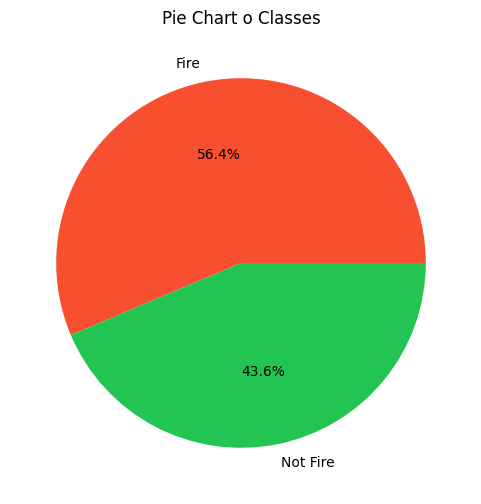

In [32]:
plt.figure(figsize=(6,6))
plt.pie(values,labels=pielabels,colors=piecolors,autopct='%1.1f%%')
plt.title("Pie Chart o Classes")
plt.show()

In [35]:
# Correlation

df4.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


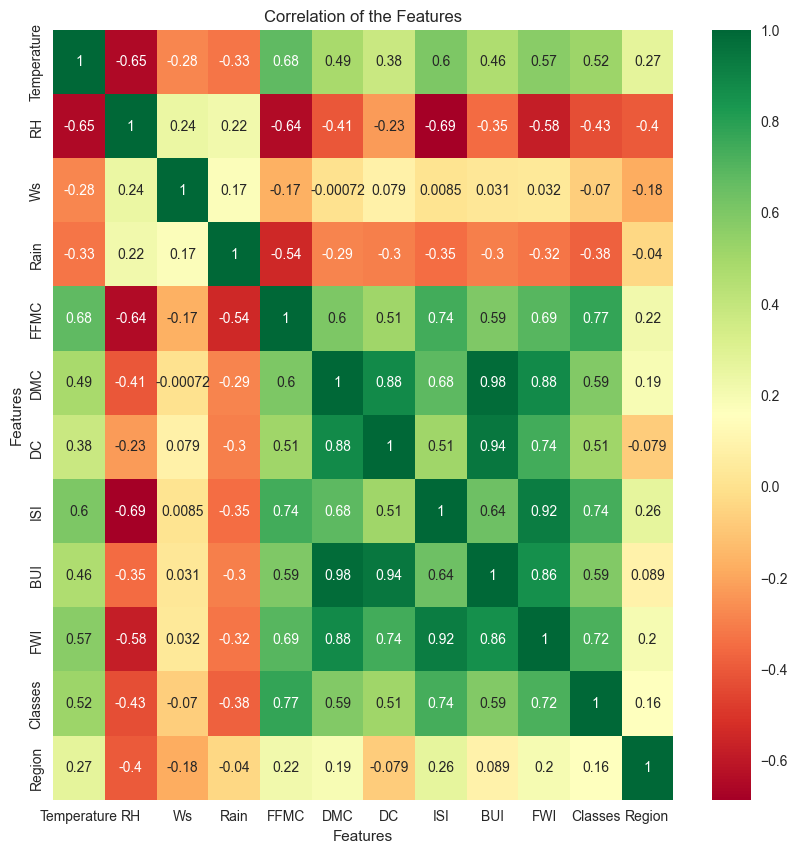

In [36]:
# Correlation using Heatmap

plt.figure(figsize=(10,10))
sns.heatmap(df4.corr(),cmap='RdYlGn',annot=True)
plt.title('Correlation of the Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

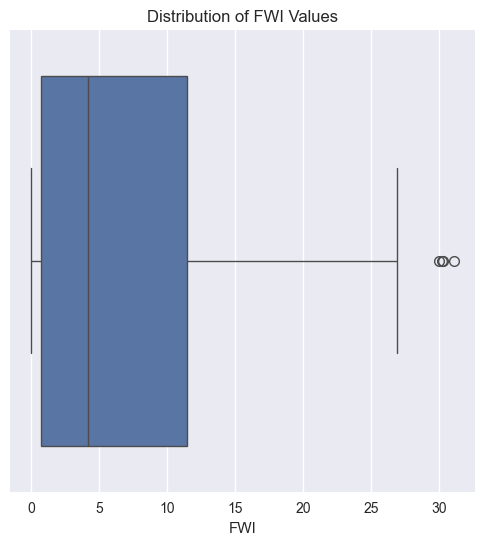

In [37]:
# Creating a Box Plot for FWI

plt.figure(figsize=(6,6))
sns.boxplot(x=df4['FWI'])
plt.title('Distribution of FWI Values')
plt.show()

In [38]:
df4.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


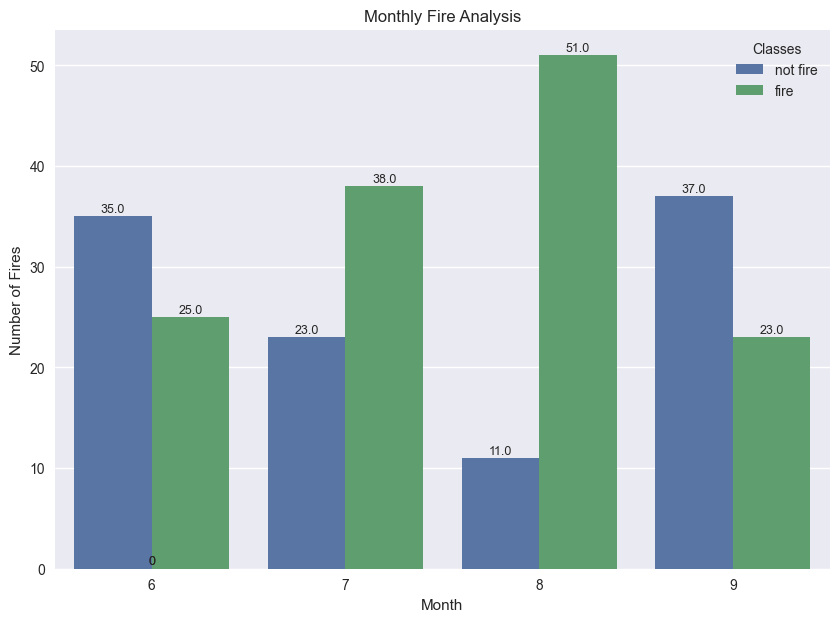

In [39]:
# Monthly Fire Analysis

plt.figure(figsize=(10,7))
bar_plot = sns.countplot(df3,x='month',hue='Classes')
plt.title('Monthly Fire Analysis')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
for bar in bar_plot.patches:

  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    bar_plot.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 5),
                   textcoords='offset points')
plt.show()

Its observed that July and August had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August

Less Fires was on September

## **4. Model Building**

In [40]:
df5 = df4.copy()

In [41]:
# Independent and Dependent Variables
X=df5.drop(['FWI','Classes'],axis=1)
y=df5['FWI']

In [42]:
# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=None)

In [43]:
print('Shapes\nX Train ->',X_train.shape)
print('X Test ->',X_test.shape)
print('Y Train ->',y_train.shape)
print('Y Test ->',y_test.shape)

Shapes
X Train -> (170, 10)
X Test -> (73, 10)
Y Train -> (170,)
Y Test -> (73,)


###i) Feature Selection Based on Correlation

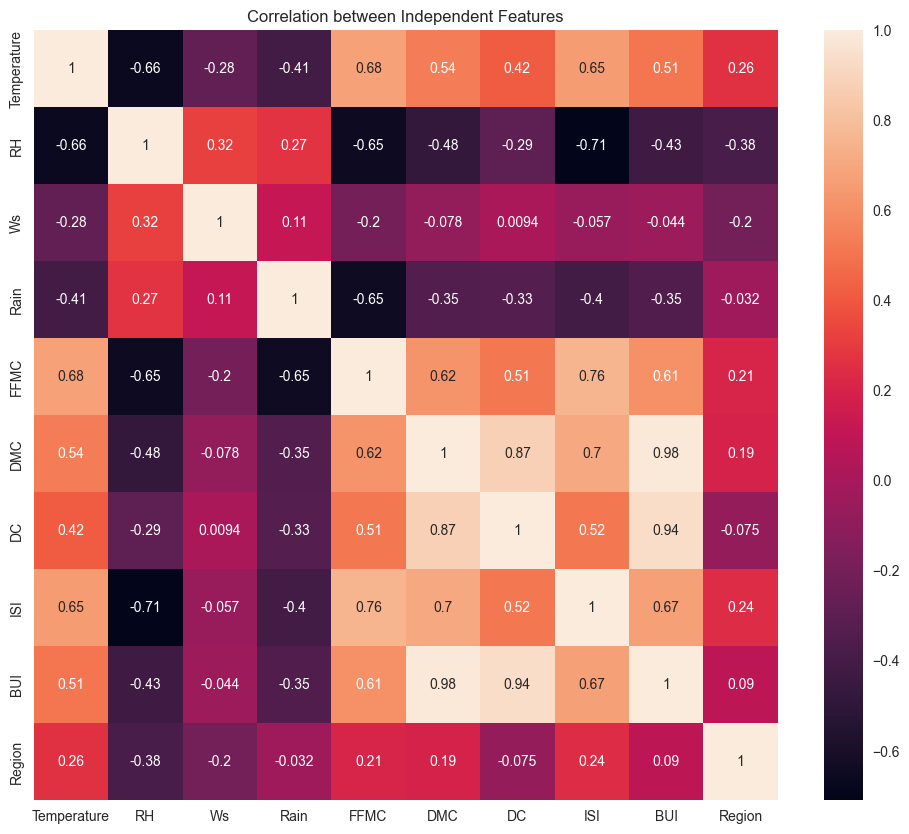

In [44]:
corr =  X_train.corr()
plt.figure(figsize=(12,10))
plt.title('Correlation between Independent Features')
sns.heatmap(corr,annot=True)
plt.show()

In [45]:
# Checking columns with High Correlation i.e 0.80

def correlation_check(dataset,threshold):
  corr_matrix = dataset.corr()
  corr=set()
  col_list = dataset.columns
  for i in range(len(col_list)):
    for j in range(i+1,len(col_list)):
      if(corr_matrix.iloc[i,j]>=threshold):
        corr.add(col_list[j])
  return corr

In [46]:
corr_features = correlation_check(X_train,0.80)
corr_features

{'BUI', 'DC'}

In [47]:
# Dropping above columns in X_train and X_test

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [48]:
print('Shapes\nX Train ->',X_train.shape)
print('X Test ->',X_test.shape)

Shapes
X Train -> (170, 8)
X Test -> (73, 8)


###ii) Linear Regression

Mean Absolute Error: 0.8416748546023337
R2 Score: 0.9297090532879416




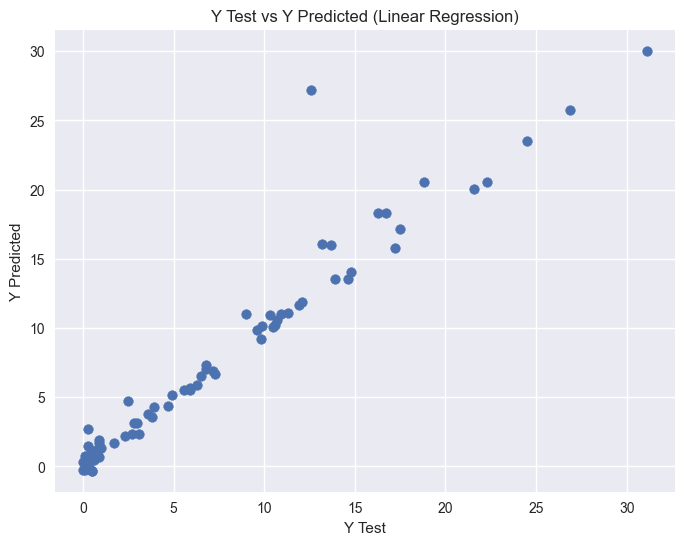

In [49]:
#Prediction

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Errors

mae = mean_absolute_error(y_test,y_pred)
score  = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",score)
print('\n')

# Graphs

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.title('Y Test vs Y Predicted (Linear Regression)')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

###iii) Lasso Regression

Mean Absolute Error: 0.9873658932527091
R2 Score: 0.9370887072289473




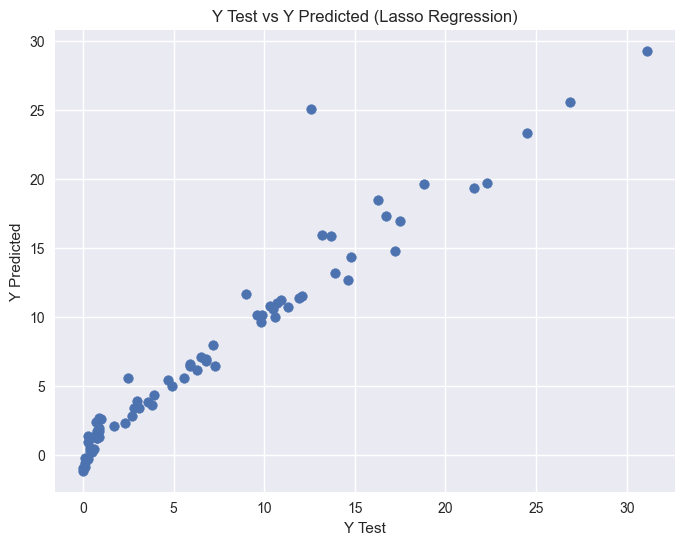

In [51]:
#Prediction

ls = Lasso()
ls.fit(X_train,y_train)
y_pred = ls.predict(X_test)

# Errors

mae = mean_absolute_error(y_test,y_pred)
score  = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",score)
print('\n')

# Graphs

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.title('Y Test vs Y Predicted (Lasso Regression)')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

###iv) Ridge Regression

Mean Absolute Error: 0.8423436223435491
R2 Score: 0.9297636300153911




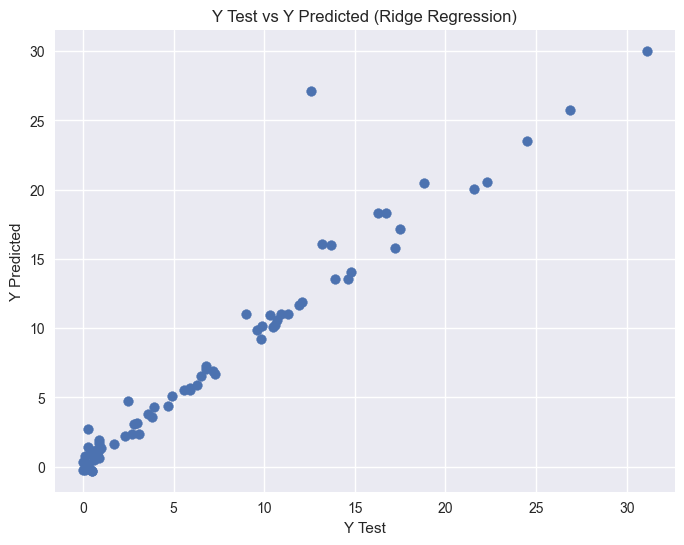

In [52]:
#Prediction

rg = Ridge()
rg.fit(X_train,y_train)
y_pred = rg.predict(X_test)

# Errors

mae = mean_absolute_error(y_test,y_pred)
score  = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",score)
print('\n')

# Graphs

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.title('Y Test vs Y Predicted (Ridge Regression)')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

###v) ElasticNet Regression

Mean Absolute Error: 0.9700568689994474
R2 Score: 0.9370097191492393




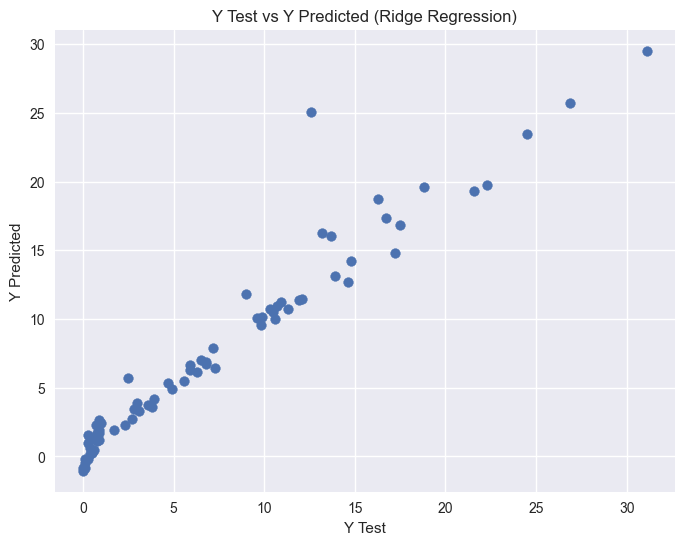

In [53]:
#Prediction

en = ElasticNet()
en.fit(X_train,y_train)
y_pred = en.predict(X_test)

# Errors

mae = mean_absolute_error(y_test,y_pred)
score  = r2_score(y_test,y_pred)

print("Mean Absolute Error:",mae)
print("R2 Score:",score)
print('\n')

# Graphs

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.title('Y Test vs Y Predicted (Ridge Regression)')
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

## **5. Prediction**

Leverage the trained models to make predictions on new data, assessing their performance and reliability.

As we can see above, the Linear Regression model provides the best score. Hence we will use this model for further predictions of FWI

In [54]:
def values_predictor(temperature,rh,ws,rain,ffmc,dmc,isi,region):
  input = [[temperature,rh,ws,rain,ffmc,dmc,isi,region]]
  predicted_value = lr.predict(input)
  return float(predicted_value)

The FWI has six levels of danger:

* **Very low danger** - Less than 5
* **Low danger** - Between 5 and 8.9
* **Moderate danger** - Between 9 and 16.4
* **High danger** - Between 16.5 and 30.4
* **Very high danger** - Between 30.5 and 42.4
* **Extreme danger** -  Greater than 42.4

In [55]:
def danger_predictor(val):
  if val < 5.2:
    return 'very low danger'
  elif val >= 5.2 and val < 11.2:
    return 'low danger'
  elif val >= 11.2 and val < 21.3:
    return 'moderate danger'
  elif val >= 21.3 and val < 38:
    return 'high danger'
  elif val >= 38 and val < 50:
    return 'very high danger'
  elif val >= 50:
    return 'extreme danger'

In [56]:
temp  = df3.drop(['DC','BUI'],axis=1)
temp[(temp['month'] == 8) & (temp['FWI'] > 25)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes,Region
89,29,8,2012,35,48,18,0.0,90.1,54.2,12.5,30.2,fire,0
199,18,8,2012,37,37,14,0.0,94.3,35.9,16.0,26.3,fire,1
205,24,8,2012,35,38,15,0.0,92.1,51.3,12.2,26.9,fire,1
206,25,8,2012,34,40,18,0.0,92.1,56.3,14.3,31.1,fire,1
207,26,8,2012,33,37,16,0.0,92.2,61.3,13.1,30.3,fire,1
208,27,8,2012,36,54,14,0.0,91.0,65.9,10.0,26.1,fire,1


In [57]:
temperature = 35
rh = 48
ws = 18
rain = 0.0
ffmc = 90.1
dmc = 54.2
isi = 12.5
region = 0

predict = values_predictor(temperature,rh,ws,rain,ffmc,dmc,isi,region)
predict = round(predict,1)
print(f'FWI is {predict} and the area is in {danger_predictor(predict)} of fire')

FWI is 27.9 and the area is in high danger of fire


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Temp\ipykernel_13236\3793724655.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(predicted_value)


In [59]:
import pickle

saved_models = {
    'model' : lr
}

with open(r'F:\Ankith\Project\Python Projects\fire prediction\Model\Artifact\saved models.pickle','wb') as f:
  pickle.dump(saved_models,f)

In [60]:
with open(r'F:\Ankith\Project\Python Projects\fire prediction\Model\Artifact\saved models.pickle','rb') as f:
  print(pickle.load(f))

{'model': LinearRegression()}


In [61]:
import json

columns = {
    'region' : ["Bejaia Region", "Sidi-Bel Abbes Region"]
}

with open(r'F:\Ankith\Project\Python Projects\fire prediction\Model\Artifact\prediction_input.json','w') as f:
  f.write(json.dumps(columns))

# **Limitations**

* The model was trained exclusively using data from the 'Bejaia' and 'Sidi-Bel Abbes' Regions.
* The training dataset spans from June 2012 to September 2012.
* Exclusion of 'Drought Code (DC)' and 'Buildup Index (BUI)' input values is recommended due to their high correlation with 'Duff Moisture Code (DMC).'
* The training prioritizes region-specific insights, focusing on the unique characteristics of 'Bejaia' and 'Sidi-Bel Abbes' during the specified time period.

# **Conclusion**

In conclusion, the 'Algerian_Fire_Forecaster' project successfully utilized Python and machine learning techniques to predict the Fire Weather Index (FWI) for locations in Algeria. By employing temperature, relative humidity (rh), wind speed (ws), rainfall (rain), Fine Fuel Moisture Code (FFMC), Duff Moisture Code (DMC), Initial Spread Index (ISI), fire classes, and regional parameters as input features, our model demonstrated the ability to assess the potential fire danger.

The predictive model not only showcased the importance of meteorological and environmental variables in determining FWI but also provided valuable insights into the factors contributing to fire risk in Algerian regions.

This project contributes to the ongoing efforts in fire management by offering a proactive tool for assessing and forecasting fire risk. The insights gained from this predictive model can aid authorities and stakeholders in making informed decisions regarding fire prevention, preparedness, and response strategies.

As with any predictive model, continuous monitoring and refinement are essential to adapt to changing environmental conditions. Future work may involve incorporating additional data sources, exploring advanced machine learning algorithms, and collaborating with local authorities to enhance the model's accuracy and reliability.

In summary, the 'Algerian_Fire_Forecaster' project leverages the power of machine learning to enhance our understanding of fire weather dynamics in Algeria, ultimately contributing to more effective wildfire risk management strategies in the region.